In [2]:
# PLOT - parse data + std-dev
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/tmp/ipykernel_773461/308549236.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [13]:
def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

## New plots - PraaS stores data in S3 and caches locally

In [19]:

data_path = os.path.join(os.path.pardir, os.path.pardir, 'data', 'latex-serving')

d = []

d2 = []
for size in ['small', 'medium', 'large', 'largest']:
    
    data = pd.read_csv(os.path.join(data_path, f'latex_editing_{size}_new.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    d.append(data)
    
    data = pd.read_csv(os.path.join(data_path, f'latex_compiling_{size}.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    data.drop(['download-time', 'compile-time'],axis=1,inplace=True)
    d2.append(data)

mapping = {
    'secs/acks.tex': 'Input 1',
    'secs/multi.tex': 'Input 2',
    'secs/core.tex': 'Input 3',
    'sampleteaser.pdf': 'Input 4'
}
mappings_size = {
    'small': '0.25 vCPU',
    'medium': '0.50 vCPU',
    'large': '1 vCPU',
    'largest': '2 vCPU'
}
    
praas_services = pd.concat(d).reset_index()
for index, row in praas_services.iterrows():
    praas_services.loc[index, 'input'] = mapping[row['input']]
    
    
for index, row in praas_services.iterrows():
    praas_services.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    praas_services.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 
    #print(p[1])

#praas_services['new_type'] = praas_services.apply(lambda x: x)
#praas_services['new_type'].apply(lambda x: [1, 2], axis=1) = f"{praas_services['type']}, {praas_services['input']}" 
    
print(praas_services)

mapping_compile = {
    'small-update': 'Input 1',
    'large-update': 'Input 2',
    'full': 'Input 3',
    'default': 'Input 1'
}
praas_compile = pd.concat(d2).reset_index()

for index, row in praas_compile.iterrows():
    praas_compile.loc[index, 'input'] = mapping_compile[row['input']]
    #print(p[1])
    
for index, row in praas_compile.iterrows():
    praas_compile.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    praas_compile.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 

df_full = pd.concat([praas_compile, praas_services])

df_not_compile = df_full.loc[~df_full['new_type'].str.contains('compile')]
df_compile = df_full.loc[df_full['new_type'].str.contains('compile')]
print(df_full)

      index         type    input  repetition  input-size  output-size  \
0         0  update-file  Input 1           1         781           49   
1         1  update-file  Input 1           2         781           49   
2         2  update-file  Input 1           3         781           49   
3         3  update-file  Input 1           4         781           49   
4         4  update-file  Input 1           5         781           49   
...     ...          ...      ...         ...         ...          ...   
1595    395     get-file  Input 4          46          66       585416   
1596    396     get-file  Input 4          47          66       585416   
1597    397     get-file  Input 4          48          66       585416   
1598    398     get-file  Input 4          49          66       585416   
1599    399     get-file  Input 4          50          66       585416   

            time     size platform              new_type          new_size  
0      30.970767    small    praas

In [20]:

d = []

d2 = []
for size in ['small', 'medium', 'large', 'largest']:
    
    data = pd.read_csv(os.path.join(data_path, f'latex_editing_lambda_{size}.csv'))
    data['size'] = size
    data['platform'] = 'lambda'
    data['time'] /= 1000.0 * 1000.0
    d.append(data)
    
    data = pd.read_csv(os.path.join(data_path, f'latex_compiling_lambda_{size}.csv'))
    data['size'] = size
    data['platform'] = 'lambda'
    data['time'] /= 1000.0 * 1000.0
    data.drop(['download-time', 'compile-time'],axis=1,inplace=True)
    d2.append(data)
    
mapping = {
    'secs/acks.tex': 'Input 1',
    'secs/multi.tex': 'Input 2',
    'secs/core.tex': 'Input 3',
    'sampleteaser.pdf': 'Input 4'
}
mappings_size = {
    'small': '443 MiB',
    'medium': '885 MiB',
    'large': '1769 MiB',
    'largest': '3538 MiB'
}
    
lambda_services = pd.concat(d).reset_index()
for index, row in lambda_services.iterrows():
    lambda_services.loc[index, 'input'] = mapping[row['input']]
    
for index, row in lambda_services.iterrows():
    lambda_services.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    lambda_services.loc[index, 'new_size'] = f"Lambda, {mappings_size[row['size']]}" 

mappings_compile = {
    'small-update': 'Input 1',
    'large-update': 'Input 2',
    'full': 'Input 3',
    'default': 'Input 1'
}
lambda_compile = pd.concat(d2).reset_index()

for index, row in lambda_compile.iterrows():
    lambda_compile.loc[index, 'input'] = mapping_compile[row['input']]
    
for index, row in lambda_compile.iterrows():
    lambda_compile.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    lambda_compile.loc[index, 'new_size'] = f"Lambda, {mappings_size[row['size']]}" 

    
df_lambda = pd.concat([lambda_compile, lambda_services])
print(lambda_compile)
df_lambda_not_compile = df_lambda.loc[~df_lambda['new_type'].str.contains('compile')]
df_lambda_compile = df_lambda.loc[df_lambda['new_type'].str.contains('compile')]
#print(df_full)

     index     type    input  repetition  input-size  output-size  \
0        0  compile  Input 3           1          55        41654   
1        1  compile  Input 3           2          55        41655   
2        2  compile  Input 3           3          55        41655   
3        3  compile  Input 3           4          55        41655   
4        4  compile  Input 3           5          55        41655   
..     ...      ...      ...         ...         ...          ...   
795    195  get-pdf  Input 1          46          52          613   
796    196  get-pdf  Input 1          47          52          613   
797    197  get-pdf  Input 1          48          52          613   
798    198  get-pdf  Input 1          49          52          613   
799    199  get-pdf  Input 1          50          52          612   

             time     size platform          new_type          new_size  
0    11658.717584    small   lambda  compile, Input 3   Lambda, 443 MiB  
1    11409.962222    sm

In [21]:
full_data_not_compile = pd.concat([df_lambda_not_compile,df_not_compile])
full_data_compile = pd.concat([df_lambda_compile,df_compile])

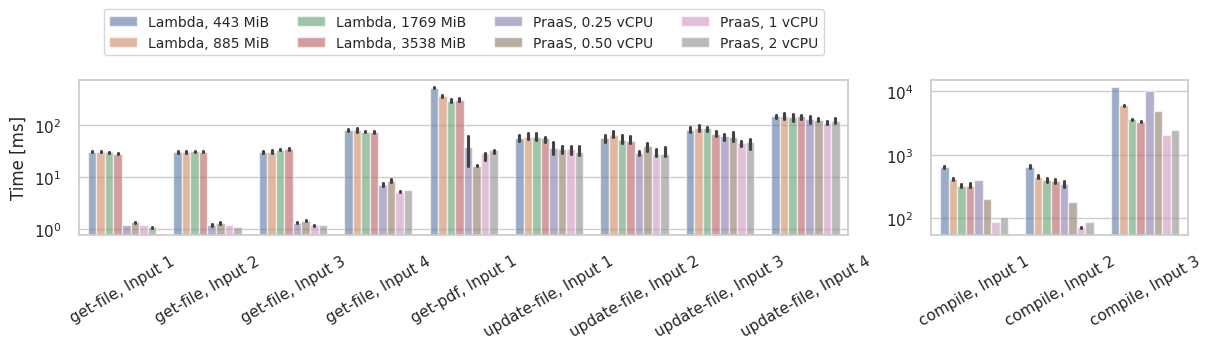

In [22]:
#print(full_data_compile)

from matplotlib.pyplot import figure

sns.set(rc={'figure.figsize':(12,3)})
sns.set_style("whitegrid")
#figure(figsize=(12,4), dpi=300)
#figure(figsize=(20,3), dpi=300)


fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3,1], layout='constrained')

#ax = plt.gca()

ax = ax1

#color = ['green','orange','red','blue','limegreen','darkgreen','royalblue','navy']

#import scienceplots
sns.set_style("whitegrid")
#plt.style.use(["science"])

from natsort import index_natsorted
import numpy as np
from natsort import natsort_keygen
#sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=lambda x: np.argsort(index_natsorted(df["time"])))
sorted_data = full_data_not_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
#ax.set_xlabel('Service, benchmarking scenario')
ax.set_ylabel('Time [ms]')
ax.set_yscale('log')
ax.set_xlabel('')
#ax.xticks(rotation=30)
ax.tick_params(axis='x', labelrotation=30)
#ax.setp(ax.xaxis.get_majorticklabels(), ha='right')
#ax.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.5), fontsize=10, ncol=4)

ax = ax2

sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
#plt.xlabel('Service, benchmarking scenario')
#plt.ylabel('Time [ms]')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yscale('log')
ax.tick_params(axis='x', labelrotation=30)
#plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
#plt.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=3)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=4)
ax.legend().set_visible(False)


ax.figure.savefig("latex_full.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

## Old plots - PraaS stores data only locally

In [8]:
# Loading and parsing data


data_path = os.path.join(os.path.pardir, os.path.pardir, 'data', 'latex-serving')

d = []

d2 = []
for size in ['small', 'medium', 'large', 'largest']:
    
    data = pd.read_csv(os.path.join(data_path, f'latex_editing_{size}.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    d.append(data)
    
    data = pd.read_csv(os.path.join(data_path, f'latex_compiling_{size}.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    data.drop(['download-time', 'compile-time'],axis=1,inplace=True)
    d2.append(data)

mapping = {
    'secs/acks.tex': 'Input 1',
    'secs/multi.tex': 'Input 2',
    'secs/core.tex': 'Input 3',
    'sampleteaser.pdf': 'Input 4'
}
mappings_size = {
    'small': '0.25 vCPU',
    'medium': '0.50 vCPU',
    'large': '1 vCPU',
    'largest': '2 vCPU'
}
    
praas_services = pd.concat(d).reset_index()
for index, row in praas_services.iterrows():
    praas_services.loc[index, 'input'] = mapping[row['input']]
    
    
for index, row in praas_services.iterrows():
    praas_services.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    praas_services.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 
    #print(p[1])

#praas_services['new_type'] = praas_services.apply(lambda x: x)
#praas_services['new_type'].apply(lambda x: [1, 2], axis=1) = f"{praas_services['type']}, {praas_services['input']}" 
    
print(praas_services)

mapping_compile = {
    'small-update': 'Input 1',
    'large-update': 'Input 2',
    'full': 'Input 3',
    'default': 'Input 1'
}
praas_compile = pd.concat(d2).reset_index()

for index, row in praas_compile.iterrows():
    praas_compile.loc[index, 'input'] = mapping_compile[row['input']]
    #print(p[1])
    
for index, row in praas_compile.iterrows():
    praas_compile.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    praas_compile.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 

df_full = pd.concat([praas_compile, praas_services])

df_not_compile = df_full.loc[~df_full['new_type'].str.contains('compile')]
df_compile = df_full.loc[df_full['new_type'].str.contains('compile')]
print(df_full)

      index         type    input  repetition  input-size  output-size  \
0         0  update-file  Input 1           1         781           42   
1         1  update-file  Input 1           2         781           42   
2         2  update-file  Input 1           3         781           42   
3         3  update-file  Input 1           4         781           42   
4         4  update-file  Input 1           5         781           42   
...     ...          ...      ...         ...         ...          ...   
1594    395     get-file  Input 4          46          66       585416   
1595    396     get-file  Input 4          47          66       585416   
1596    397     get-file  Input 4          48          66       585416   
1597    398     get-file  Input 4          49          66       585416   
1598    399     get-file  Input 4          50          66       585416   

           time     size platform              new_type          new_size  
0      1.397492    small    praas  

In [37]:
# Loading and parsing data


data_path = os.path.join(os.path.pardir, os.path.pardir, 'data', 'latex-serving')

d = []

d2 = []
for size in ['small', 'medium', 'large', 'largest']:
    
    data = pd.read_csv(os.path.join(data_path, f'latex_editing_{size}_new.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    d.append(data)
    
    #data = pd.read_csv(os.path.join(data_path, f'latex_editing_{size}_new.csv'))
    #data['size'] = size
    #data['platform'] = 'praas_new'
    #data['time'] /= 1000.0 * 1000.0
    #d.append(data)
    
    
    data = pd.read_csv(os.path.join(data_path, f'latex_compiling_{size}.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    data.drop(['download-time', 'compile-time'],axis=1,inplace=True)
    d2.append(data)

mapping = {
    'secs/acks.tex': 'Input 1',
    'secs/multi.tex': 'Input 2',
    'secs/core.tex': 'Input 3',
    'sampleteaser.pdf': 'Input 4'
}
mappings_size = {
    'small': '0.25 vCPU',
    'medium': '0.50 vCPU',
    'large': '1 vCPU',
    'largest': '2 vCPU'
}
    
praas_services = pd.concat(d).reset_index()
for index, row in praas_services.iterrows():
    praas_services.loc[index, 'input'] = mapping[row['input']]
    
    
for index, row in praas_services.iterrows():
    praas_services.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    praas_services.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 
    #print(p[1])

#praas_services['new_type'] = praas_services.apply(lambda x: x)
#praas_services['new_type'].apply(lambda x: [1, 2], axis=1) = f"{praas_services['type']}, {praas_services['input']}" 
    
print(praas_services)

mapping_compile = {
    'small-update': 'Input 1',
    'large-update': 'Input 2',
    'full': 'Input 3',
    'default': 'Input 1'
}
praas_compile = pd.concat(d2).reset_index()

for index, row in praas_compile.iterrows():
    praas_compile.loc[index, 'input'] = mapping_compile[row['input']]
    #print(p[1])
    
for index, row in praas_compile.iterrows():
    praas_compile.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    praas_compile.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 

df_full = pd.concat([praas_compile, praas_services])

df_not_compile = df_full.loc[~df_full['new_type'].str.contains('compile')]
df_compile = df_full.loc[df_full['new_type'].str.contains('compile')]
print(df_full)

/tmp/ipykernel_2026332/2592563679.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


      index         type    input  repetition  input-size  output-size  \
0         0  update-file  Input 1           1         781           49   
1         1  update-file  Input 1           2         781           49   
2         2  update-file  Input 1           3         781           49   
3         3  update-file  Input 1           4         781           49   
4         4  update-file  Input 1           5         781           49   
...     ...          ...      ...         ...         ...          ...   
1235    395  update-file  Input 4          46          66       585416   
1236    396  update-file  Input 4          47          66       585416   
1237    397  update-file  Input 4          48          66       585416   
1238    398  update-file  Input 4          49          66       585416   
1239    399  update-file  Input 4          50          66       585416   

            time     size platform              new_type          new_size  
0      30.970767    small    praas

In [9]:

d = []

d2 = []
for size in ['small', 'medium', 'large', 'largest']:
    
    data = pd.read_csv(os.path.join(data_path, f'latex_editing_lambda_{size}.csv'))
    data['size'] = size
    data['platform'] = 'lambda'
    data['time'] /= 1000.0 * 1000.0
    d.append(data)
    
    data = pd.read_csv(os.path.join(data_path, f'latex_compiling_lambda_{size}.csv'))
    data['size'] = size
    data['platform'] = 'lambda'
    data['time'] /= 1000.0 * 1000.0
    data.drop(['download-time', 'compile-time'],axis=1,inplace=True)
    d2.append(data)
    
mapping = {
    'secs/acks.tex': 'Input 1',
    'secs/multi.tex': 'Input 2',
    'secs/core.tex': 'Input 3',
    'sampleteaser.pdf': 'Input 4'
}
mappings_size = {
    'small': '443 MiB',
    'medium': '885 MiB',
    'large': '1769 MiB',
    'largest': '3538 MiB'
}
    
lambda_services = pd.concat(d).reset_index()
for index, row in lambda_services.iterrows():
    lambda_services.loc[index, 'input'] = mapping[row['input']]
    
for index, row in lambda_services.iterrows():
    lambda_services.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    lambda_services.loc[index, 'new_size'] = f"Lambda, {mappings_size[row['size']]}" 

mappings_compile = {
    'small-update': 'Input 1',
    'large-update': 'Input 2',
    'full': 'Input 3',
    'default': 'Input 1'
}
lambda_compile = pd.concat(d2).reset_index()

for index, row in lambda_compile.iterrows():
    lambda_compile.loc[index, 'input'] = mapping_compile[row['input']]
    
for index, row in lambda_compile.iterrows():
    lambda_compile.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    lambda_compile.loc[index, 'new_size'] = f"Lambda, {mappings_size[row['size']]}" 

    
df_lambda = pd.concat([lambda_compile, lambda_services])
print(lambda_compile)
df_lambda_not_compile = df_lambda.loc[~df_lambda['new_type'].str.contains('compile')]
df_lambda_compile = df_lambda.loc[df_lambda['new_type'].str.contains('compile')]
#print(df_full)

     index     type    input  repetition  input-size  output-size  \
0        0  compile  Input 3           1          55        41654   
1        1  compile  Input 3           2          55        41655   
2        2  compile  Input 3           3          55        41655   
3        3  compile  Input 3           4          55        41655   
4        4  compile  Input 3           5          55        41655   
..     ...      ...      ...         ...         ...          ...   
795    195  get-pdf  Input 1          46          52          613   
796    196  get-pdf  Input 1          47          52          613   
797    197  get-pdf  Input 1          48          52          613   
798    198  get-pdf  Input 1          49          52          613   
799    199  get-pdf  Input 1          50          52          612   

             time     size platform          new_type          new_size  
0    11658.717584    small   lambda  compile, Input 3   Lambda, 443 MiB  
1    11409.962222    sm

In [10]:
full_data_not_compile = pd.concat([df_lambda_not_compile,df_not_compile])
full_data_compile = pd.concat([df_lambda_compile,df_compile])

     index     type    input  repetition  input-size  output-size  \
0        0  compile  Input 3           1          55        41654   
1        1  compile  Input 3           2          55        41655   
2        2  compile  Input 3           3          55        41655   
3        3  compile  Input 3           4          55        41655   
4        4  compile  Input 3           5          55        41655   
..     ...      ...      ...         ...         ...          ...   
745    145  compile  Input 2          46          56          269   
746    146  compile  Input 2          47          56          269   
747    147  compile  Input 2          48          56          268   
748    148  compile  Input 2          49          56          269   
749    149  compile  Input 2          50          56          269   

             time     size platform          new_type         new_size  
0    11658.717584    small   lambda  compile, Input 3  Lambda, 443 MiB  
1    11409.962222    smal

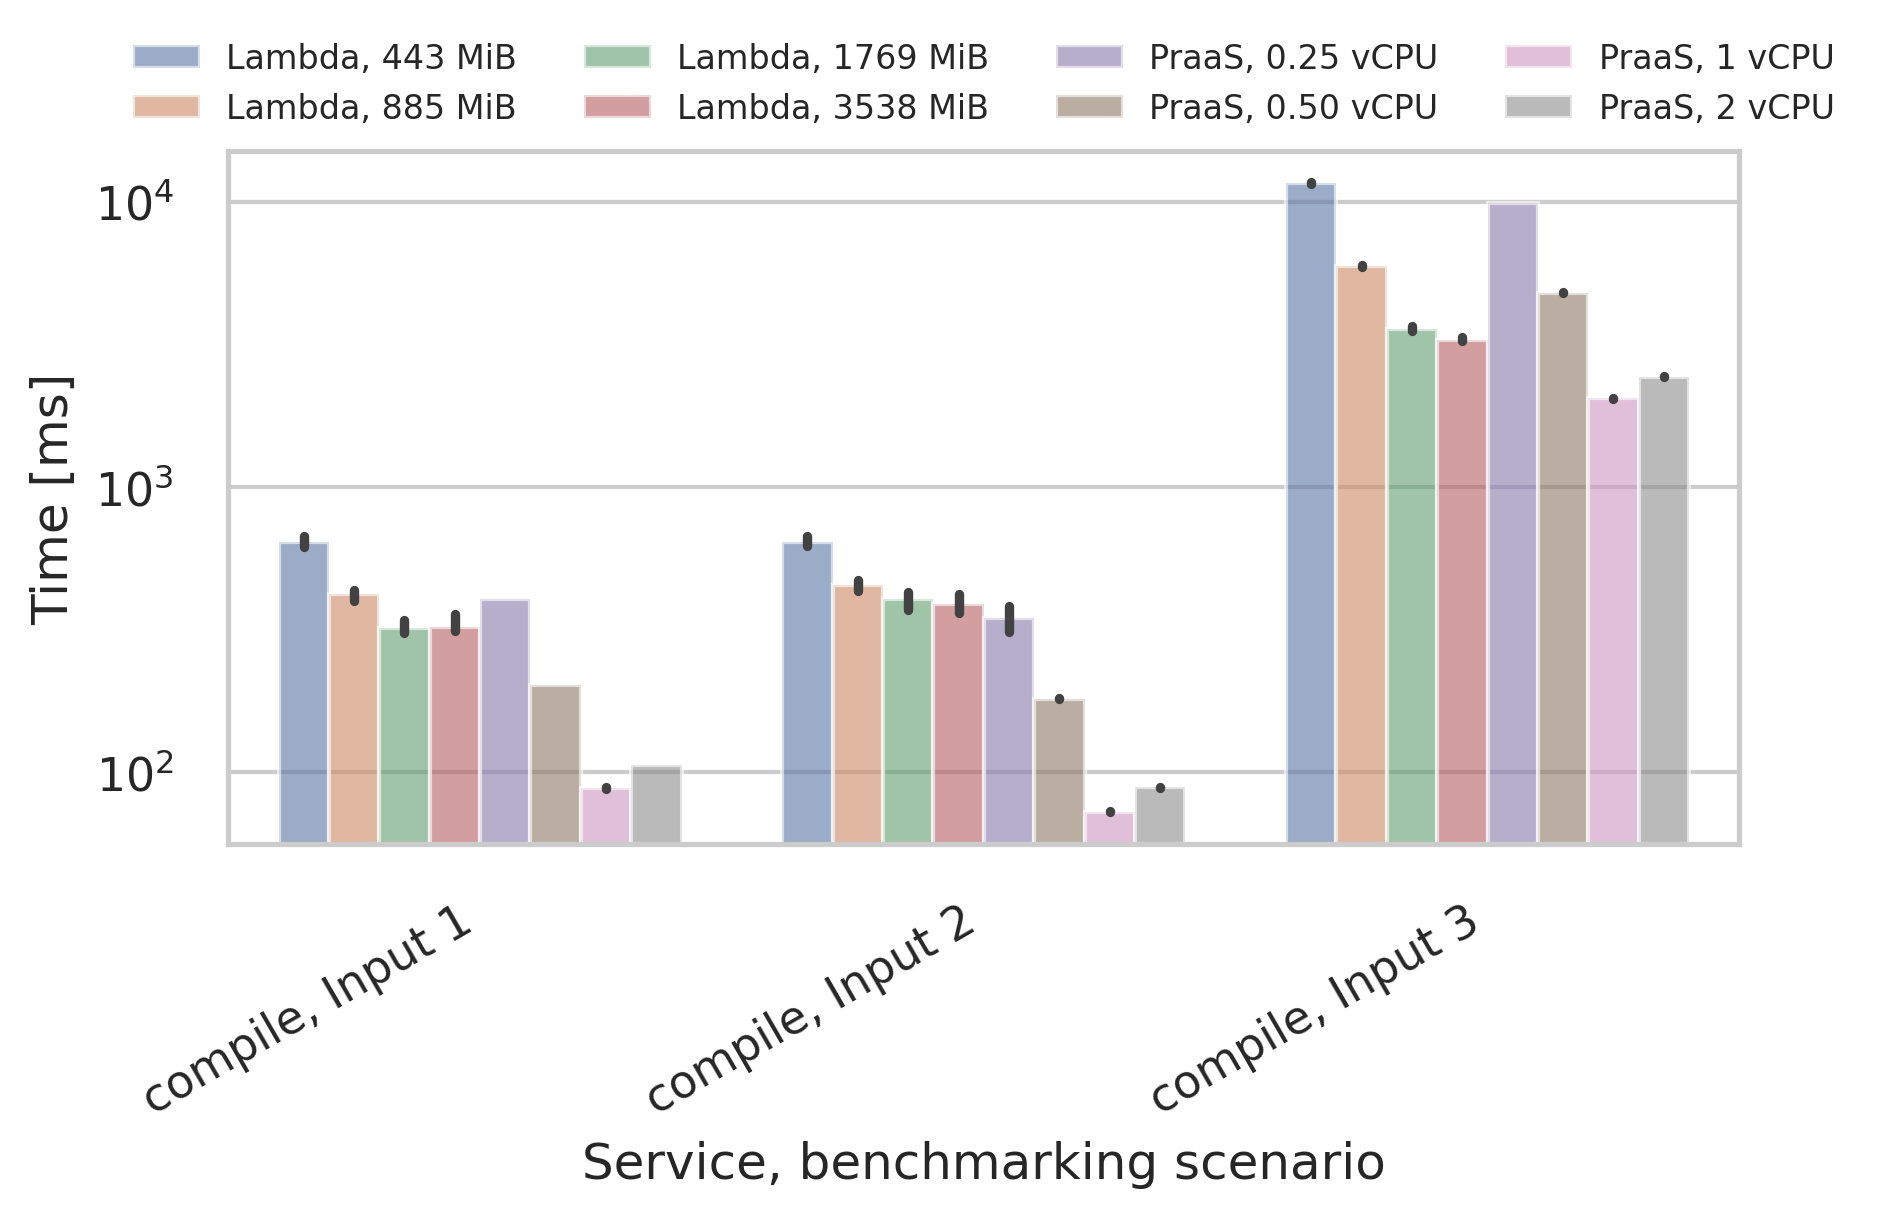

In [14]:
print(full_data_compile)

from matplotlib.pyplot import figure
#figure(figsize=(6.5,4), dpi=300)
figure(figsize=(6.5,3), dpi=300)
ax = plt.gca()

#color = ['green','orange','red','blue','limegreen','darkgreen','royalblue','navy']

from natsort import index_natsorted
import numpy as np
from natsort import natsort_keygen
#sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=lambda x: np.argsort(index_natsorted(df["time"])))
sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
plt.xlabel('Service, benchmarking scenario')
plt.ylabel('Time [ms]')
plt.yscale('log')
plt.xticks(rotation=30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=4)

ax.figure.savefig("old_latex_compile.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

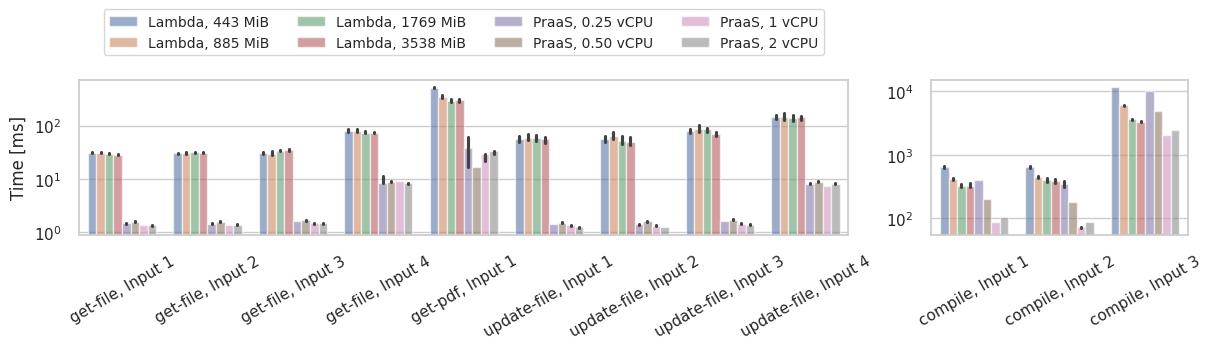

In [15]:
#print(full_data_compile)

from matplotlib.pyplot import figure

sns.set(rc={'figure.figsize':(12,3)})
sns.set_style("whitegrid")
#figure(figsize=(12,4), dpi=300)
#figure(figsize=(20,3), dpi=300)


fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3,1], layout='constrained')

#ax = plt.gca()

ax = ax1

#color = ['green','orange','red','blue','limegreen','darkgreen','royalblue','navy']

#import scienceplots
sns.set_style("whitegrid")
#plt.style.use(["science"])

from natsort import index_natsorted
import numpy as np
from natsort import natsort_keygen
#sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=lambda x: np.argsort(index_natsorted(df["time"])))
sorted_data = full_data_not_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
#ax.set_xlabel('Service, benchmarking scenario')
ax.set_ylabel('Time [ms]')
ax.set_yscale('log')
ax.set_xlabel('')
#ax.xticks(rotation=30)
ax.tick_params(axis='x', labelrotation=30)
#ax.setp(ax.xaxis.get_majorticklabels(), ha='right')
#ax.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.5), fontsize=10, ncol=4)

ax = ax2

sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
#plt.xlabel('Service, benchmarking scenario')
#plt.ylabel('Time [ms]')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yscale('log')
ax.tick_params(axis='x', labelrotation=30)
#plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
#plt.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=3)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=4)
ax.legend().set_visible(False)


ax.figure.savefig("old_latex_full.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

     index     type    input  repetition  input-size  output-size  \
0        0  compile  Input 3           1          55        41654   
1        1  compile  Input 3           2          55        41655   
2        2  compile  Input 3           3          55        41655   
3        3  compile  Input 3           4          55        41655   
4        4  compile  Input 3           5          55        41655   
..     ...      ...      ...         ...         ...          ...   
745    145  compile  Input 2          46          56          269   
746    146  compile  Input 2          47          56          269   
747    147  compile  Input 2          48          56          268   
748    148  compile  Input 2          49          56          269   
749    149  compile  Input 2          50          56          269   

             time     size platform          new_type         new_size  
0    11658.717584    small   lambda  compile, Input 3  Lambda, 443 MiB  
1    11409.962222    smal

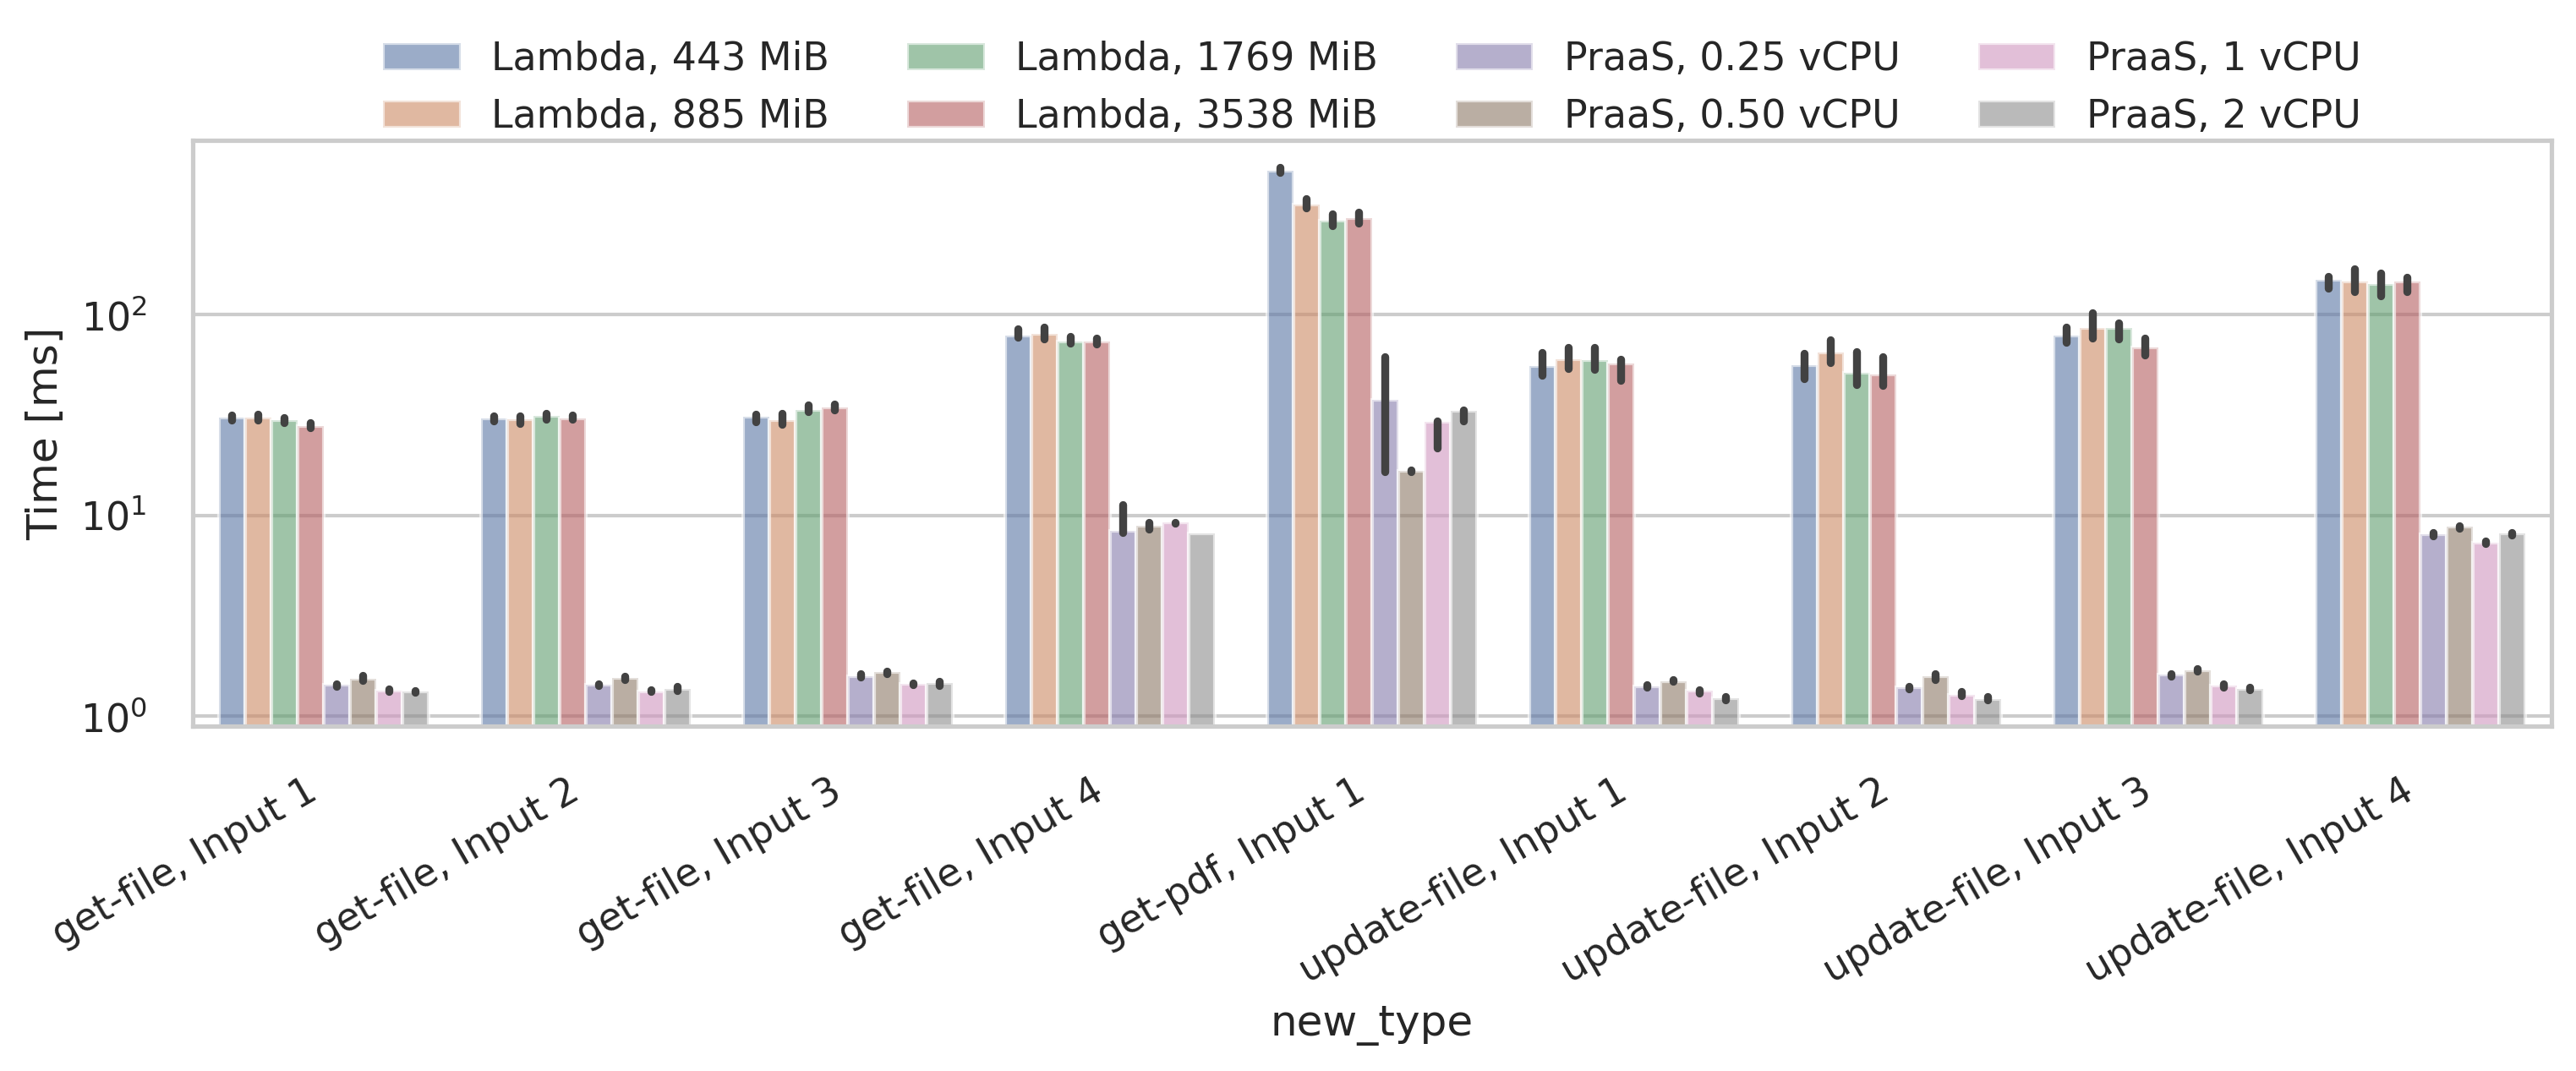

In [16]:
print(full_data_compile)

from matplotlib.pyplot import figure

#figure(figsize=(12,4), dpi=300)
figure(figsize=(12,3), dpi=300)

ax = plt.gca()

#color = ['green','orange','red','blue','limegreen','darkgreen','royalblue','navy']

#import scienceplots
sns.set_style("whitegrid")
#plt.style.use(["science"])

from natsort import index_natsorted
import numpy as np
from natsort import natsort_keygen
#sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=lambda x: np.argsort(index_natsorted(df["time"])))
sorted_data = full_data_not_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
#plt.xlabel('Service, benchmarking scenario')
plt.ylabel('Time [ms]')
plt.yscale('log')
plt.xticks(rotation=30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.23),
          ncol=4)


ax.figure.savefig("old_latex_editing.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

     index     type    input  repetition  input-size  output-size  \
0        0  compile  Input 3           1          55        41654   
1        1  compile  Input 3           2          55        41655   
2        2  compile  Input 3           3          55        41655   
3        3  compile  Input 3           4          55        41655   
4        4  compile  Input 3           5          55        41655   
..     ...      ...      ...         ...         ...          ...   
745    145  compile  Input 2          46          56          269   
746    146  compile  Input 2          47          56          269   
747    147  compile  Input 2          48          56          268   
748    148  compile  Input 2          49          56          269   
749    149  compile  Input 2          50          56          269   

             time     size platform          new_type         new_size  
0    11658.717584    small   lambda  compile, Input 3  Lambda, 443 MiB  
1    11409.962222    smal

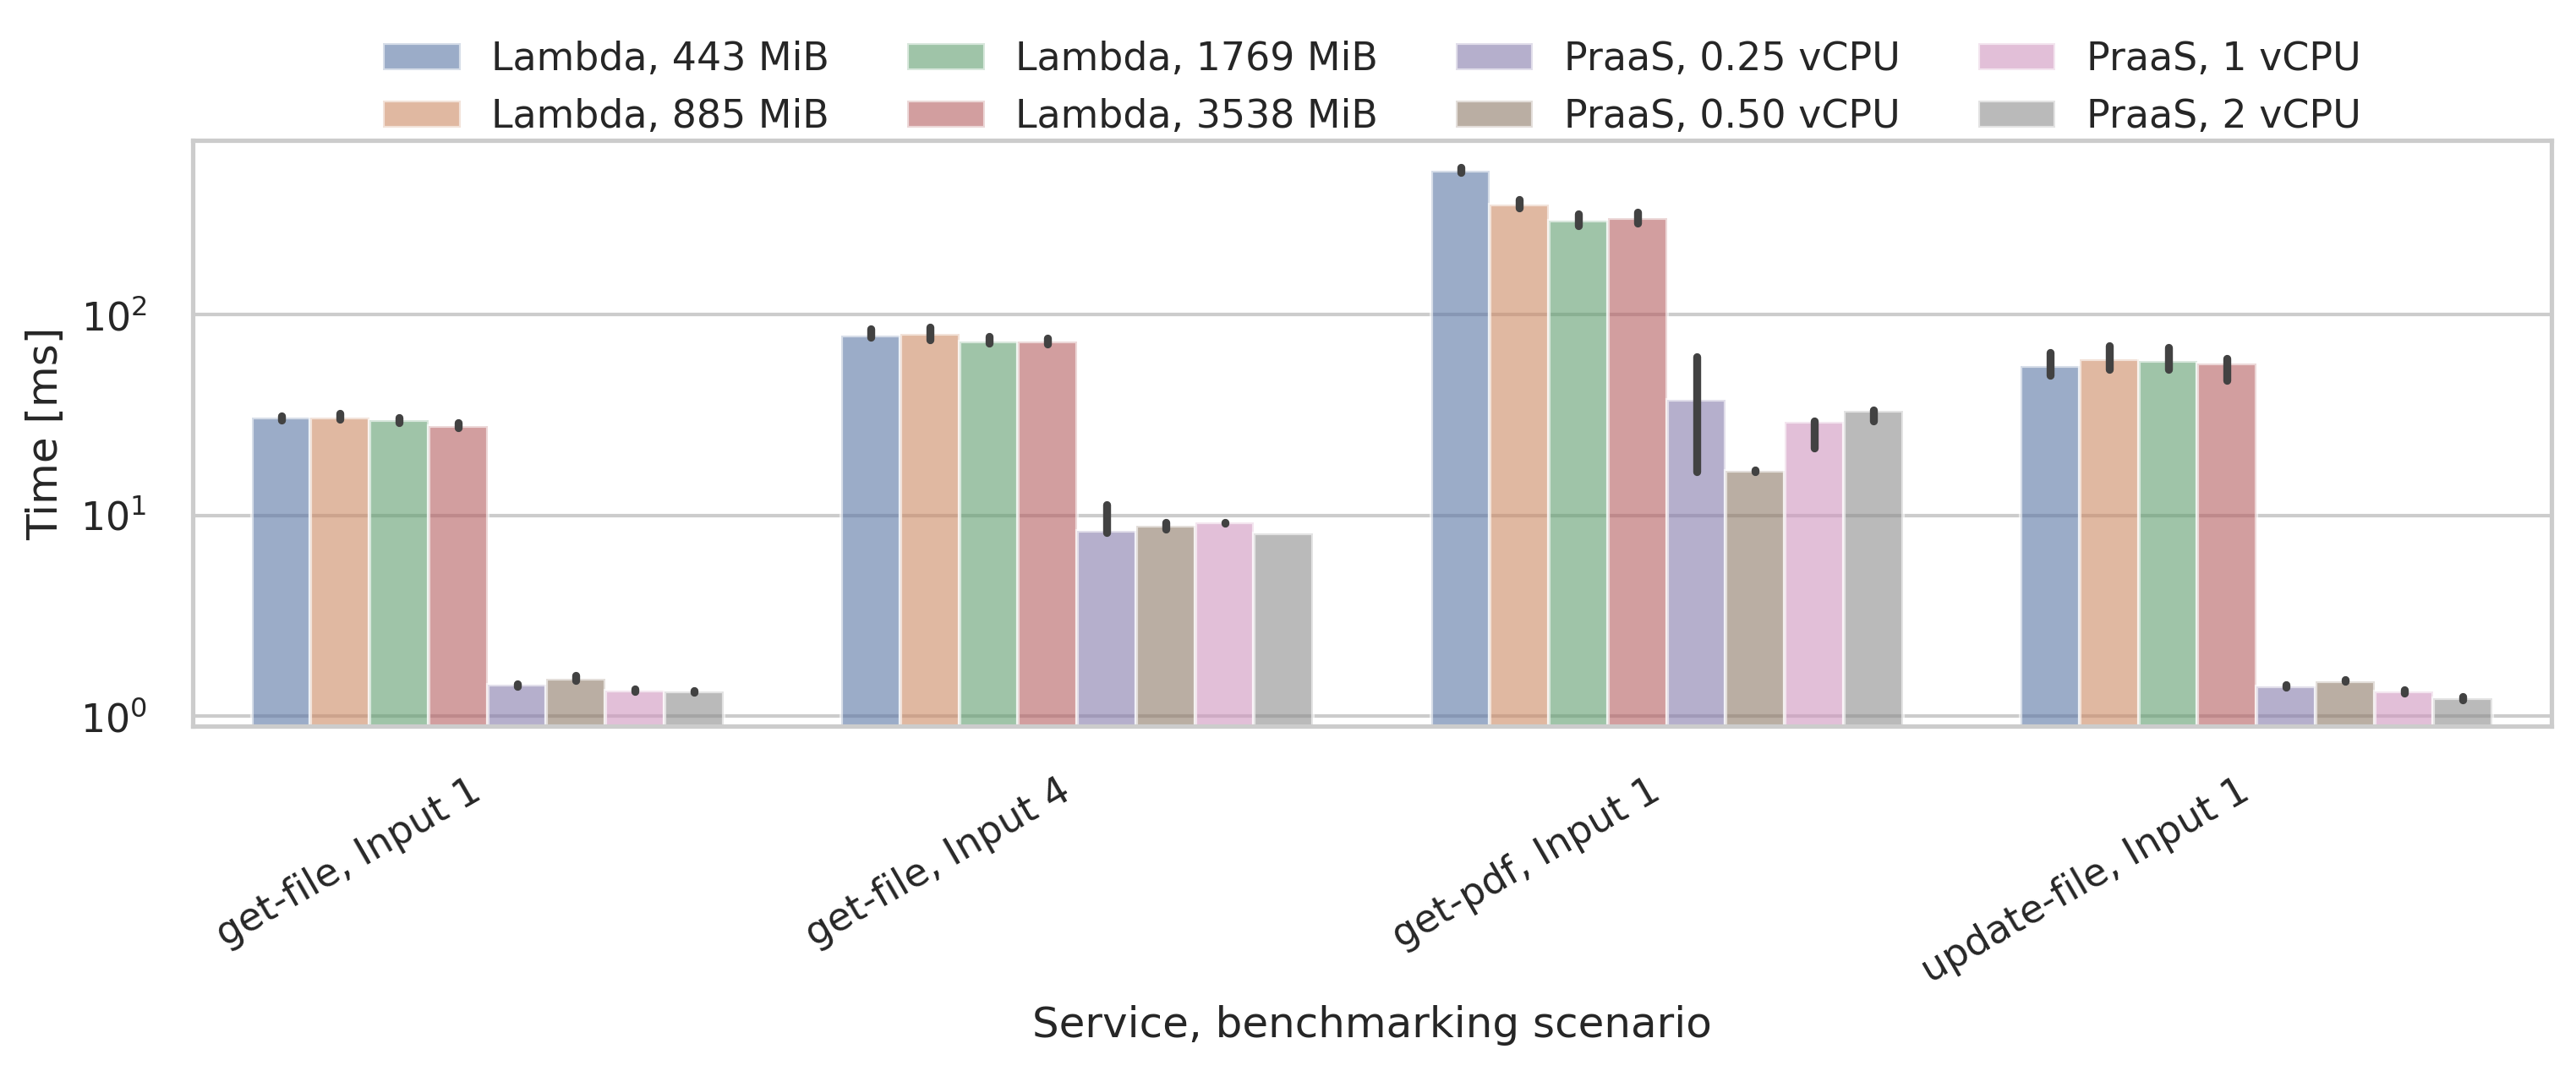

In [17]:
print(full_data_compile)

from matplotlib.pyplot import figure

#figure(figsize=(12,4), dpi=300)
figure(figsize=(12,3), dpi=300)

ax = plt.gca()

#color = ['green','orange','red','blue','limegreen','darkgreen','royalblue','navy']

#import scienceplots
sns.set_style("whitegrid")
#plt.style.use(["science"])

from natsort import index_natsorted
import numpy as np
from natsort import natsort_keygen
#sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=lambda x: np.argsort(index_natsorted(df["time"])))
sorted_data = full_data_not_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sorted_data2 = sorted_data.loc[sorted_data['new_type'].isin(['get-file, Input 1', 'get-file, Input 4', 'get-pdf, Input 1', 'update-file, Input 1'])]
sns.barplot(
    data=sorted_data2,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
plt.xlabel('Service, benchmarking scenario')
plt.ylabel('Time [ms]')
plt.yscale('log')
plt.xticks(rotation=30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.23),
          ncol=4)

for x in ax.lines:
    x.set_visible(False)
for x in ax.patches:
    x.set_visible(False)

ax.figure.savefig("old_latex_selected_empty.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

i = 0
for x in ax.lines[0:16]:
    x.set_visible(True)
for x in ax.patches[0:16]:
    x.set_visible(True)
    
    
ax.figure.savefig("old_latex_selected_lambda.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

for x in ax.lines[16:]:
    x.set_visible(True)
for x in ax.patches[16:]:
    x.set_visible(True)
                  
                  
ax.figure.savefig("old_latex_selected.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

Benchmarks after fixing the request - PraaS also uses S3 to store the file

      index         type    input  repetition  input-size  output-size  \
0         0  update-file  Input 1           1         781           49   
1         1  update-file  Input 1           2         781           49   
2         2  update-file  Input 1           3         781           49   
3         3  update-file  Input 1           4         781           49   
4         4  update-file  Input 1           5         781           49   
...     ...          ...      ...         ...         ...          ...   
1595    395     get-file  Input 4          46          66       585416   
1596    396     get-file  Input 4          47          66       585416   
1597    397     get-file  Input 4          48          66       585416   
1598    398     get-file  Input 4          49          66       585416   
1599    399     get-file  Input 4          50          66       585416   

            time     size platform              new_type          new_size  
0      30.970767    small    praas

In [51]:
full_data_not_compile = pd.concat([df_lambda_not_compile,df_not_compile])
full_data_compile = pd.concat([df_lambda_compile,df_compile])

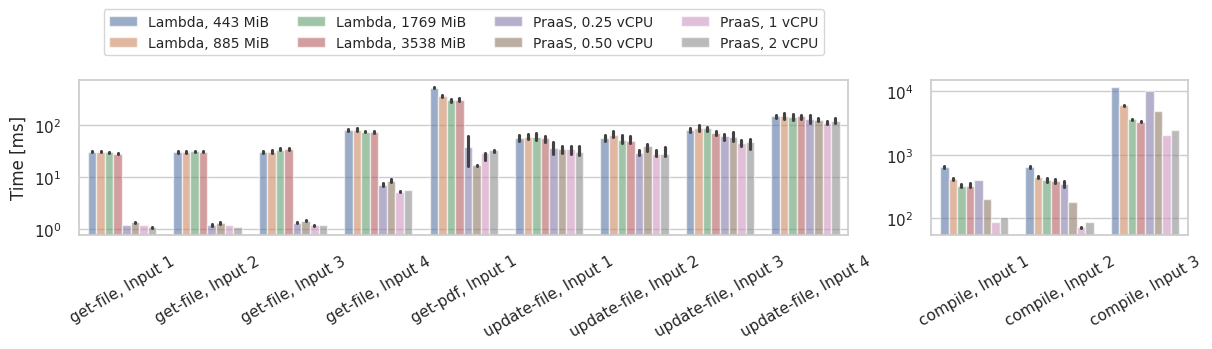

In [52]:
#print(full_data_compile)

from matplotlib.pyplot import figure

sns.set(rc={'figure.figsize':(12,3)})
sns.set_style("whitegrid")
#figure(figsize=(12,4), dpi=300)
#figure(figsize=(20,3), dpi=300)


fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3,1], layout='constrained')

#ax = plt.gca()

ax = ax1

#color = ['green','orange','red','blue','limegreen','darkgreen','royalblue','navy']

#import scienceplots
sns.set_style("whitegrid")
#plt.style.use(["science"])

from natsort import index_natsorted
import numpy as np
from natsort import natsort_keygen
#sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=lambda x: np.argsort(index_natsorted(df["time"])))
sorted_data = full_data_not_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
#ax.set_xlabel('Service, benchmarking scenario')
ax.set_ylabel('Time [ms]')
ax.set_yscale('log')
ax.set_xlabel('')
#ax.xticks(rotation=30)
ax.tick_params(axis='x', labelrotation=30)
#ax.setp(ax.xaxis.get_majorticklabels(), ha='right')
#ax.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.5), fontsize=10, ncol=4)

ax = ax2

sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    errorbar="ci", alpha=.6,#, height=6,
    estimator=p50_estimator, #palette=color,
    ax=ax
)
#plt.xlabel('Service, benchmarking scenario')
#plt.ylabel('Time [ms]')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yscale('log')
ax.tick_params(axis='x', labelrotation=30)
#plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
#plt.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=3)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=4)
ax.legend().set_visible(False)


ax.figure.savefig("latex.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

In [41]:
df_not_compile.to_csv('test.csv')